# Summary
This notebok gives some examples for how to use [GeoPandas](https://geopandas.org/en/stable/docs/user_guide.html) and the data loading utility modules in the `src` directory.

!pwd

In [1]:
!pwd


/home/ubuntu


In [2]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from src.datasets.loading import statcan, ookla
from shapely.geometry import Point
import numpy as np 
 

## Geopandas
To start, geopandas uses matplotlib as a plotting backend by default. It also has some basic data to load. 

In [4]:
#Geopandas is like pandas, but has a special "geometry" 
#column and special support for geometric operations with this column
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))
world.head(2)


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


## Basic Plotting of Tiles + Statistics Canda Shapefiles
To show some utility and make a graph where you can actually see the tiles individually, 
below is an example of some of the things you can do with GeoPandas.

In [6]:
## Statcan Data: list names of available shapefiles
statcan.boundary_names()

['provinces',
 'provinces_digital',
 'federal_electoral_districts_2013_representation_order',
 'economic_regions',
 'census_divisions',
 'population_centres',
 'population_ecumene',
 'dissemination_areas',
 'dissemination_blocks',
 'census_subdivisions',
 'designated_places',
 'lakes_and_rivers_polygons']

In [17]:
Canada_Zones = statcan.boundary('census_divisions').to_crs('epsg:4326')
Canada_Zones

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((-98.98629 54.99338, -98.98689 54.921..."
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((-91.80175 55.15887, -91.79088 55.158..."
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((-94.82341 59.99352, -94.82398 ..."
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((-102.82454 50.04735, -102.81826 50.0..."
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((-104.99185 50.04669, -104.99179 50.0..."
...,...,...,...,...,...,...
288,6105,Region 5,REG,61,Northwest Territories / Territoires du Nord-Ouest,"POLYGON ((-110.04698 62.91817, -109.67964 62.8..."
289,6106,Region 6,REG,61,Northwest Territories / Territoires du Nord-Ouest,"POLYGON ((-114.31376 66.05472, -112.58339 65.4..."
290,6204,Baffin,REG,62,Nunavut,"MULTIPOLYGON (((-74.00000 64.53750, -74.00000 ..."
291,6205,Keewatin,REG,62,Nunavut,"MULTIPOLYGON (((-92.01250 67.00000, -92.00000 ..."


<AxesSubplot: >

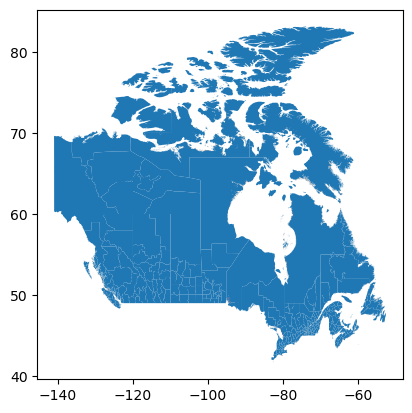

In [18]:
Canada_Zones.plot()

In [24]:
speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2022)]

In [25]:
speed_tiles.head(5)

,quadkey,geometry,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter
12,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",263271,40226,12,7,5,fixed,2022,1
31,212122230130321,"POLYGON ((-122.75574 49.30364, -122.75024 49.3...",222178,158924,8,117,39,fixed,2022,1
38,212122230130321,"POLYGON ((-122.75574 49.30364, -122.75024 49.3...",120847,23082,17,6,1,mobile,2022,1
54,212102012132221,"POLYGON ((-122.77771 53.85901, -122.77222 53.8...",174225,162880,14,5,4,fixed,2022,1
70,212122232013120,"POLYGON ((-122.89307 49.11703, -122.88757 49.1...",238545,162836,8,25,12,fixed,2022,1


In [27]:
Tiles_Canada_Zones = gp.sjoin(speed_tiles, Canada_Zones, how="inner")
Tiles_Canada_Zones['avg_d_mbps'] = Tiles_Canada_Zones['avg_d_kbps'] / 1000
Tiles_Canada_Zones['avg_u_mbps'] = Tiles_Canada_Zones['avg_u_kbps'] / 1000
Tiles_Canada_Zones.head()

,quadkey,geometry,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,index_right,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,avg_d_mbps,avg_u_mbps
12,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",263271,40226,12,7,5,fixed,2022,1,68,2458,Longueuil,TÉ,24,Quebec / Québec,263.271,40.226
2559,302303331020212,"POLYGON ((-73.46558 45.50250, -73.46008 45.502...",177010,30909,11,46,14,fixed,2022,1,68,2458,Longueuil,TÉ,24,Quebec / Québec,177.010,30.909
2570,302303331020212,"POLYGON ((-73.46558 45.50250, -73.46008 45.502...",87356,8914,18,1,1,mobile,2022,1,68,2458,Longueuil,TÉ,24,Quebec / Québec,87.356,8.914
2752,302303330131200,"POLYGON ((-73.52051 45.50635, -73.51501 45.506...",88161,19355,9,17,5,fixed,2022,1,68,2458,Longueuil,TÉ,24,Quebec / Québec,88.161,19.355
2760,302303330131200,"POLYGON ((-73.52051 45.50635, -73.51501 45.506...",54185,22975,29,10,3,mobile,2022,1,68,2458,Longueuil,TÉ,24,Quebec / Québec,54.185,22.975


In [33]:
Zone_Stats = (Tiles_Canada_Zones.groupby(["CDNAME"]).apply(lambda x: pd.Series({"avg_d_mbps_wt": np.average(x["avg_d_mbps"], weights=x["tests"])})).reset_index().merge(
Tiles_Canada_Zones.groupby(["CDNAME"]).agg(tests=("tests", "sum")).reset_index(),on=["CDNAME"],))

In [36]:
Zone_Ranking = (Zone_Stats.nlargest(10, "avg_d_mbps_wt").append(Zone_Stats.nsmallest(10, "avg_d_mbps_wt")).sort_values("avg_d_mbps_wt", ascending=False).round(2)) 
Zone_Ranking 

/tmp/ipykernel_93714/4211376393.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Zone_Ranking = (Zone_Stats.nlargest(10, "avg_d_mbps_wt").append(Zone_Stats.nsmallest(10, "avg_d_mbps_wt")).sort_values("avg_d_mbps_wt", ascending=False).round(2))


,CDNAME,avg_d_mbps_wt,tests
225,Toronto,222.25,237278
73,Fraser Valley,221.54,20504
16,Bonaventure,220.40,832
38,Cowichan Valley,219.69,4951
232,Westmorland,217.96,10268
77,Gloucester,216.82,3287
23,Capital,215.78,27830
199,Restigouche,215.10,1222
79,Greater Vancouver,212.91,232293
28,Central Okanagan,212.07,11759


In [37]:
header = ["Zone", "Avg Download Speed (Mbps)", "Tests"]
Zone_Ranking.rename(columns=dict(zip(Zone_Ranking.columns, header)))

,Zone,Avg Download Speed (Mbps),Tests
225,Toronto,222.25,237278
73,Fraser Valley,221.54,20504
16,Bonaventure,220.40,832
38,Cowichan Valley,219.69,4951
232,Westmorland,217.96,10268
77,Gloucester,216.82,3287
23,Capital,215.78,27830
199,Restigouche,215.10,1222
79,Greater Vancouver,212.91,232293
28,Central Okanagan,212.07,11759


In [42]:
Zone_Data = Canada_Zones[['CDNAME', 'geometry']].merge(Zone_Stats, on='CDNAME').to_crs('epsg:4326')

In [44]:
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 100 Mbps", "100 to 150 Mbps", "150 to 200 Mbps"]
Zone_Data['group'] = pd.cut(Zone_Data.avg_d_mbps_wt,(0, 25, 50, 100, 150, 200),right=False,labels = labels)

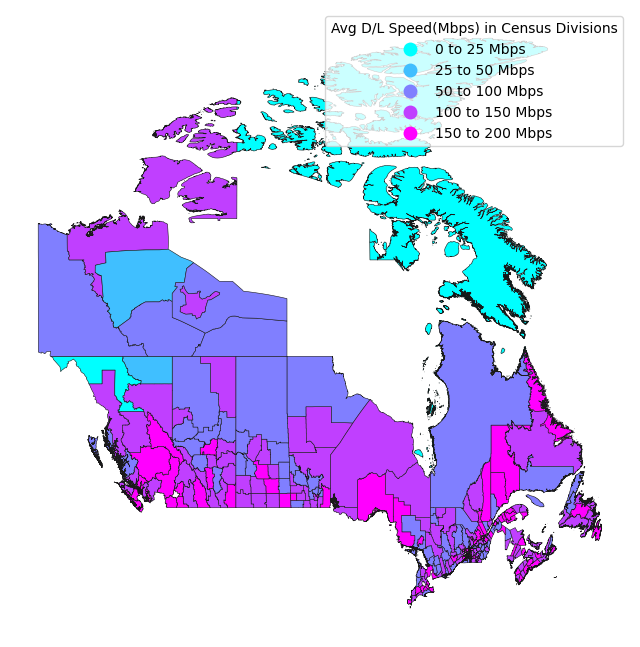

In [49]:
fig, ax = plt.subplots(1, figsize=(8, 16))

Zone_Data.plot(column="group", cmap="cool", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True)
ax.axis("off")
leg = ax.get_legend()
leg.loc = 0
leg.set_title("Avg D/L Speed(Mbps) in Census Divisions")
# You cannot convince me that this colour scheme isn't 100% inspired by a windbreaker tracksuit from the 80's....and I love it!

In [164]:
#Use a buffer to increase Calgary size, envelope creates a bounding box for use later.
calgary_area = statcan.boundary('population_centres').loc[lambda s:s.PCNAME=='Calgary'].copy()
calgary_area.geometry = calgary_area.buffer(50000).envelope #The StatCan CRS is in units of meters, so this is all tiles within 50 km of Calgary

In [132]:
nearby_census_subdivs = statcan.boundary('census_subdivisions').sjoin(calgary_area[['PCNAME','PCTYPE','PCCLASS','geometry']], how='inner')
del nearby_census_subdivs['index_right']
nearby_census_subdivs.sample(3)

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry,PCNAME,PCTYPE,PCCLASS
3963,4806021,Airdrie,CY,48,Alberta,4806,Division No. 6,CDR,4806014,Rocky View County,...,825,1,825,48825,Calgary,B,"POLYGON ((4703840.517 1949333.146, 4703012.611...",Calgary,1,4
4017,4806804,Tsuu T'ina Nation 145 (Sarcee 145),IRI,48,Alberta,4806,Division No. 6,CDR,4806014,Rocky View County,...,825,1,825,48825,Calgary,B,"POLYGON ((4678129.229 1921194.026, 4678161.211...",Calgary,1,4
4556,4806016,Calgary,CY,48,Alberta,4806,Division No. 6,CDR,4806016,Calgary,...,825,1,825,48825,Calgary,B,"POLYGON ((4684997.491 1940795.817, 4685254.177...",Calgary,1,4


<AxesSubplot: >

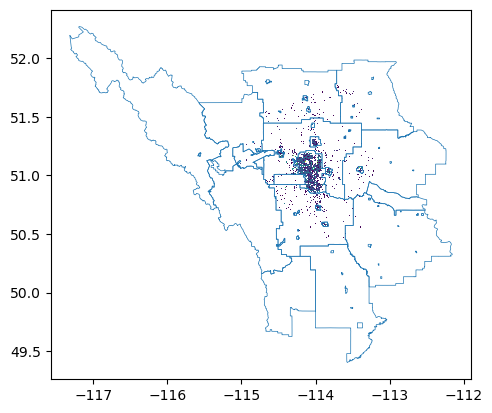

In [133]:
## the spatial join against the much wider areas of the census subdivisions 
## causes the default plotting area to be much wider than anticipated with the 
## calgary area geoemtry
nearby_speeds = speed_tiles.sjoin(calgary_area.to_crs('epsg:4326'), how='inner') #epsg:4326
ax = nearby_speeds.plot(column='avg_d_kbps')
nearby_census_subdivs.to_crs('epsg:4326').boundary.plot(ax=ax, linewidth=0.5)


### Census Info
Also some census data is available on populations.

In [134]:
subdiv_pops = statcan.census_subdivisions_populations()
subdiv_pops.DAPOP = pd.to_numeric(subdiv_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
subdiv_pops

,CSDUID,GEO_NAME,DAPOP
381,1001105,"Portugal Cove South, T",150.0
635,1001113,"Trepassey, T",485.0
1016,1001120,"St. Shott's, T",65.0
1270,1001124,"Division No. 1, Subd. U, SNO",1625.0
1778,1001126,"Cape Broyle, T",490.0
...,...,...,...
7605014,6208047,"Kugaaruk, HAM",935.0
7605268,6208059,"Kugluktuk, HAM",1490.0
7605649,6208073,"Cambridge Bay, HAM",1770.0
7606157,6208081,"Gjoa Haven, HAM",1325.0


<AxesSubplot: >

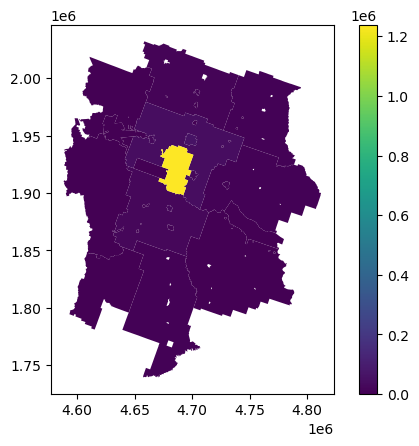

In [135]:
nearby_census_subdivs.CSDUID = nearby_census_subdivs.CSDUID.astype(int) ## coerce ID type to fully int instead of object
nearby_census_subdivs.merge(subdiv_pops, on='CSDUID', validate='1:1').plot(column='DAPOP', vmin=0, categorical=False, legend=True)

## Calculate Statistics

In [136]:
census_divs_speeds = statcan.boundary('census_divisions').to_crs('epsg:4326').sjoin(speed_tiles, how='left')

In [137]:
divs_pops = statcan.census_divisions_populations()
divs_pops.DAPOP = pd.to_numeric(divs_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
divs_pops


,CDUID,GEO_NAME,DAPOP
254,1001,Division No. 1,270345.0
72644,1002,Division No. 2,20375.0
83820,1003,Division No. 3,15560.0
92075,1004,Division No. 4,20385.0
99568,1005,Division No. 5,42015.0
...,...,...,...
7589774,6105,Region 5,6980.0
7592441,6106,Region 6,20090.0
7597775,6204,Baffin,18985.0
7602347,6205,Keewatin,10415.0


In [138]:
census_speeds_agg = (census_divs_speeds.groupby('CDUID')['avg_d_kbps'].mean()/1000).rename('avg_d_mpbs')

[Text(0.5, 37.61536509065093, 'Easting (m)'),
 Text(55.847222222222214, 0.5, 'Northing (m)')]

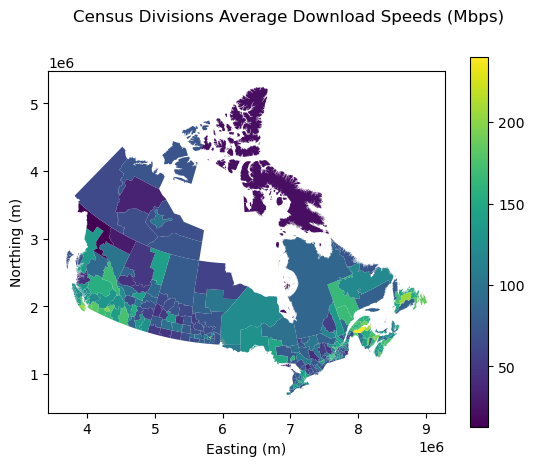

In [139]:
statcan.boundary('census_divisions').merge(census_speeds_agg, left_on="CDUID", right_index=True).plot(column='avg_d_mpbs', legend=True)
plt.gcf().suptitle("Census Divisions Average Download Speeds (Mbps)")
plt.gca().set(xlabel="Easting (m)", ylabel="Northing (m)")

TypeError: boundary_names() takes 0 positional arguments but 1 was given